## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

## Reading the csv file

In [2]:
car_data=pd.read_csv('Car details v3.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Pre-processing the data

In [3]:
car_data.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [4]:
car_data= car_data.dropna()

In [5]:
car_data.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage          False
engine           False
max_power        False
torque           False
seats            False
dtype: bool

In [6]:
x=car_data["mileage"].str.split(" ", n = 1, expand = True)

In [7]:
del car_data['mileage']

In [8]:
car_data['mileage']=x[0].astype(float)

In [11]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10


In [12]:
car_data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine            object
max_power         object
torque            object
seats            float64
mileage          float64
dtype: object

In [13]:
# Function for splitting the column values
def split_column(column):
    x=column.str.split(" ", n = 1, expand = True)
    return x

In [14]:
engine=split_column(car_data['engine'])

In [15]:
engine

,0,1
0,1248,CC
1,1498,CC
2,1497,CC
3,1396,CC
4,1298,CC
...,...,...
8123,1197,CC
8124,1493,CC
8125,1248,CC
8126,1396,CC


In [16]:
car_data['engine']=engine[0].astype(int)

In [17]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10


In [18]:
max_power=split_column(car_data['max_power'])

In [19]:
max_power

,0,1
0,74,bhp
1,103.52,bhp
2,78,bhp
3,90,bhp
4,88.2,bhp
...,...,...
8123,82.85,bhp
8124,110,bhp
8125,73.9,bhp
8126,70,bhp


In [20]:
car_data['max_power']=max_power[0].astype(float)

In [22]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248,74.00,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498,103.52,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16.10


In [23]:
car_data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
engine             int32
max_power        float64
torque            object
seats            float64
mileage          float64
dtype: object

## Exploratory Data Analysis

In [24]:
group_by_owner=car_data.groupby(by='owner').agg(mean_selling_price=("selling_price", "mean"),mean_km_driven=('km_driven',"mean")).reset_index()

In [25]:
group_by_owner

,owner,mean_selling_price,mean_km_driven
0,First Owner,7.899799e+05,57135.392713
1,Fourth & Above Owner,2.331968e+05,104451.843750
2,Second Owner,4.012035e+05,89564.407242
3,Test Drive Car,4.403800e+06,14631.400000
4,Third Owner,2.931873e+05,101367.007843


In [26]:
group_by_owner=group_by_owner.drop(3)

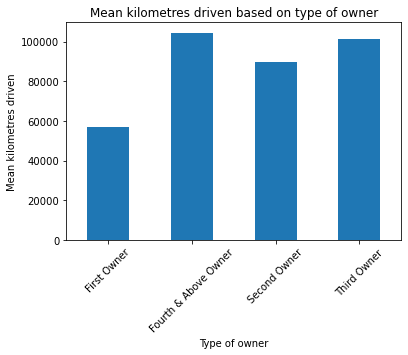

In [27]:
group_by_owner.plot(kind='bar',x='owner',y='mean_km_driven', rot=45,linewidth=10, legend= False
                      )
plt.xlabel("Type of owner")
plt.ylabel("Mean kilometres driven")
plt.title('Mean kilometres driven based on type of owner')
plt.show()

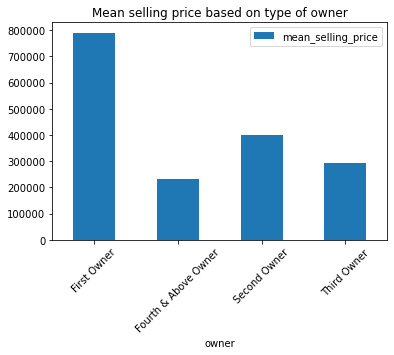

In [28]:
group_by_owner.plot(kind='bar',x='owner',y='mean_selling_price', rot=45,linewidth=10
                      )
plt.title('Mean selling price based on type of owner')
plt.show()

In [29]:
group_by_year=car_data.groupby(by='year').agg(mean_selling_price=("selling_price", "mean")).reset_index()

In [30]:
group_by_year.head(20)

,year,mean_selling_price
0,1994,72000.000000
1,1995,55000.000000
2,1996,41000.000000
3,1997,86111.000000
4,1998,57888.888889
5,1999,76928.571429
6,2000,76460.933333
7,2001,46500.000000
8,2002,103789.421053
9,2003,101572.918919


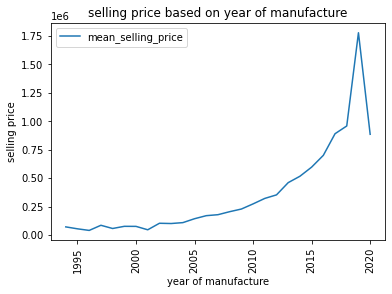

In [31]:
group_by_year.plot(kind='line',x='year',y='mean_selling_price', rot=90
                      )
plt.title('selling price based on year of manufacture')
plt.ylabel('selling price')
plt.xlabel('year of manufacture')
plt.show()

Text(0.5, 1.0, 'Heatmap of correlation')

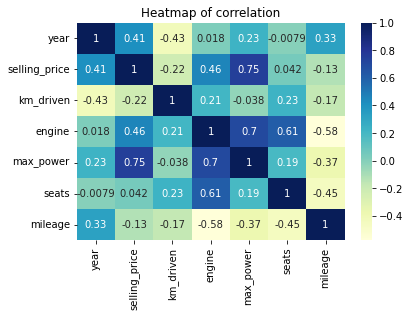

In [32]:
dataplot = sns.heatmap(car_data.corr(),cmap="YlGnBu", annot=True)
plt.title('Heatmap of correlation', fontsize = 12)

In [33]:
car_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [34]:
group_by_fuel=car_data.groupby(by='fuel').agg(number_of_car=('fuel','count'),mean_selling_price=('selling_price', 'mean')).reset_index()

In [35]:
group_by_fuel

,fuel,number_of_car,mean_selling_price
0,CNG,52,317903.788462
1,Diesel,4299,802450.282624
2,LPG,35,210885.714286
3,Petrol,3520,472665.203125


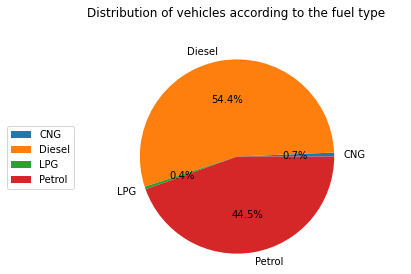

In [36]:
plt.pie(group_by_fuel['number_of_car'].tolist(),labels=group_by_fuel['fuel'].tolist(),autopct='%1.1f%%')
plt.title('Distribution of vehicles according to the fuel type', pad=32)
plt.legend(loc='center left',bbox_to_anchor=(-0.2, 0.5))
plt.axis('equal')
plt.show()

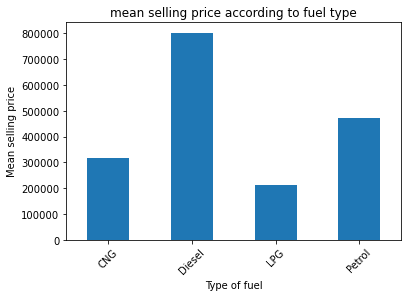

In [37]:
group_by_fuel.plot(kind='bar',x='fuel',y='mean_selling_price', rot=45,linewidth=10, legend= False
                      )
plt.xlabel("Type of fuel")
plt.ylabel("Mean selling price")
plt.title('mean selling price according to fuel type')
plt.show()

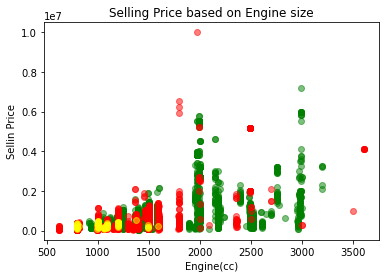

In [38]:
filter1= car_data['fuel']=='Diesel'
filter2= car_data['fuel']=='Petrol'
filter3=(car_data['fuel']=='CNG')|(car_data['fuel']=='LPG')

plt.scatter(car_data.where(filter1)['engine'],car_data.where(filter1)['selling_price'],color="green",alpha=0.5)
plt.scatter(car_data.where(filter2)['engine'],car_data.where(filter2)['selling_price'],color="red",alpha=0.5)
plt.scatter(car_data.where(filter3)['engine'],car_data.where(filter3)['selling_price'],color="yellow",alpha=0.5)
plt.xlabel('Engine(cc)')
plt.ylabel('Sellin Price')
plt.title('Selling Price based on Engine size')
plt.show()


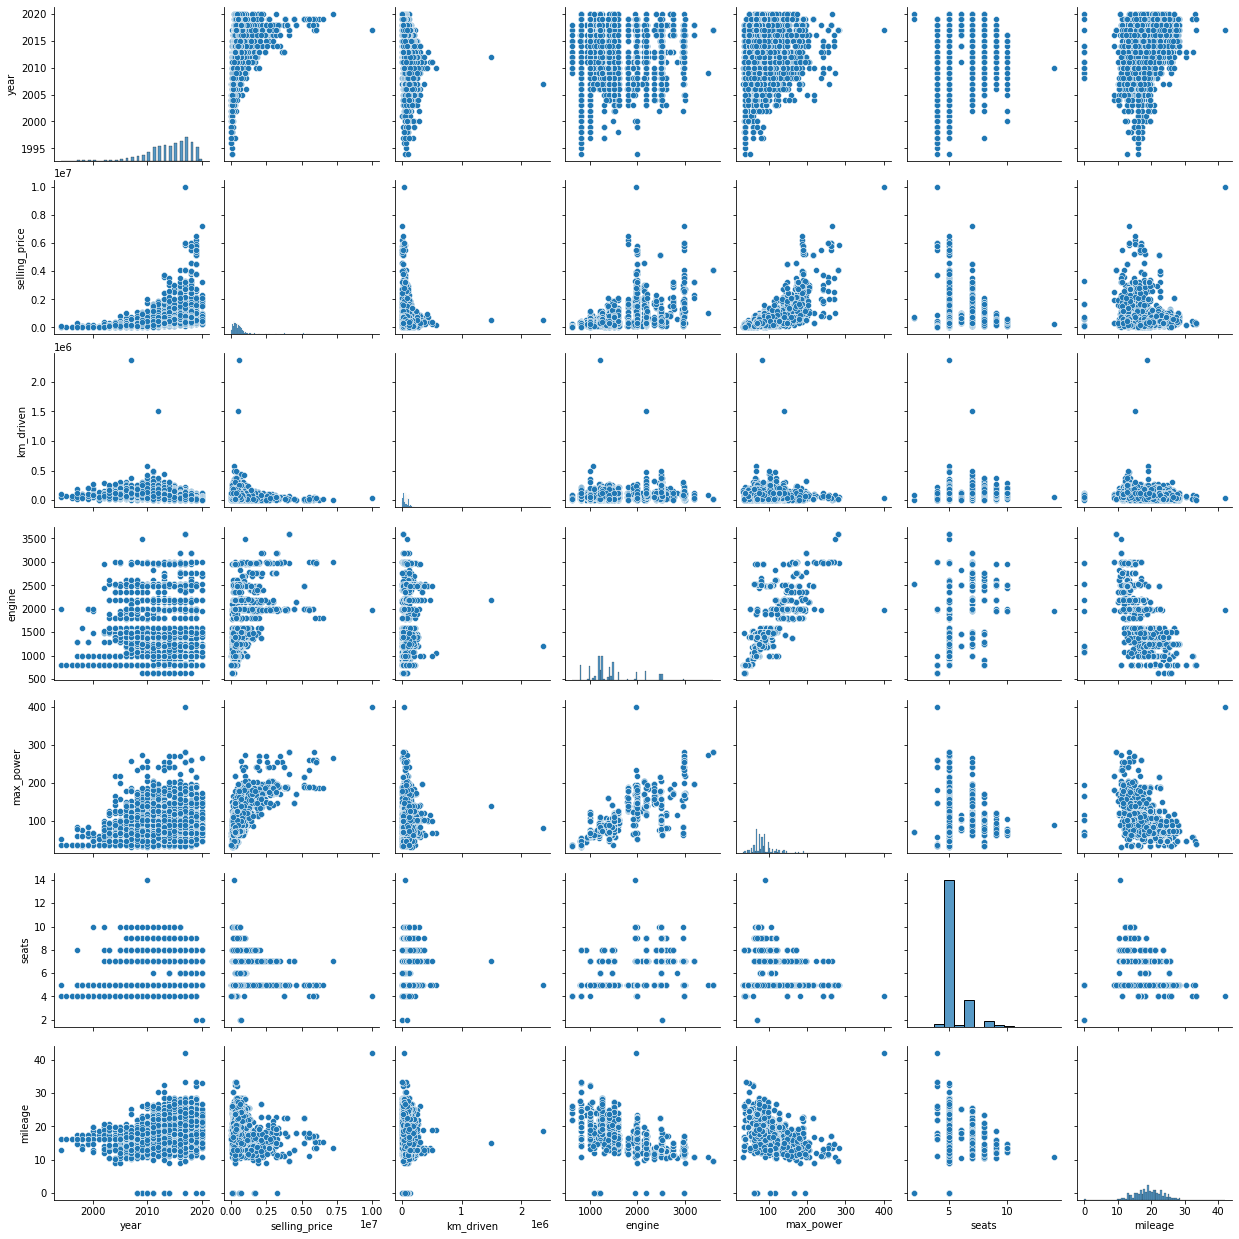

In [39]:
sns.pairplot(car_data, height=2.5)

## Unsupervised learning (K-means)

In [40]:
df_k=car_data.loc[:,['engine','selling_price']]

In [41]:
df_k

,engine,selling_price
0,1248,450000
1,1498,370000
2,1497,158000
3,1396,225000
4,1298,130000
...,...,...
8123,1197,320000
8124,1493,135000
8125,1248,382000
8126,1396,290000


In [42]:
scaler = MinMaxScaler()

scaler.fit(df_k[['selling_price']])
df_k['selling_price'] = scaler.transform(df_k[['selling_price']])

scaler.fit(df_k[['engine']])
df_k['engine'] = scaler.transform(df_k[['engine']])

In [43]:
df_k.head()

,engine,selling_price
0,0.209396,0.042126
1,0.293289,0.034102
2,0.292953,0.012839
3,0.259060,0.019559
4,0.226174,0.010030


Text(0.5, 1.0, 'scatter plot of selling price vs engine size')

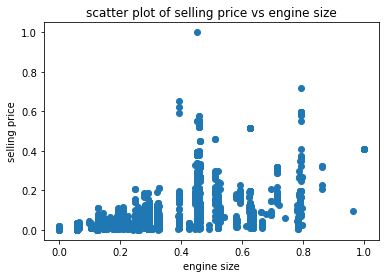

In [44]:
plt.scatter(df_k['engine'],df_k['selling_price'])
plt.xlabel('engine size')
plt.ylabel('selling price')
plt.title('scatter plot of selling price vs engine size')

In [45]:
sse = []
k_rang = range(1,10)
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df_k)
    sse.append(km.inertia_)

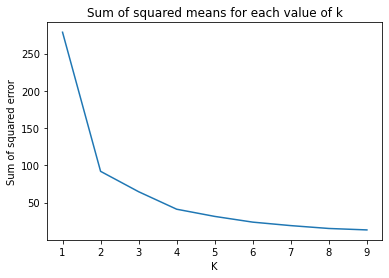

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Sum of squared means for each value of k')
plt.plot(k_rang,sse)

In [152]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_k)
y_predicted

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
km.cluster_centers_

array([[ 5.82282751e-01,  7.82456817e-02,  2.00000000e+00],
       [ 2.39341898e-01,  4.78876352e-02, -2.22044605e-15],
       [ 1.00417708e-01,  2.14421625e-02,  1.00000000e+00],
       [ 5.18797000e-01,  3.93961463e-01,  3.00000000e+00]])

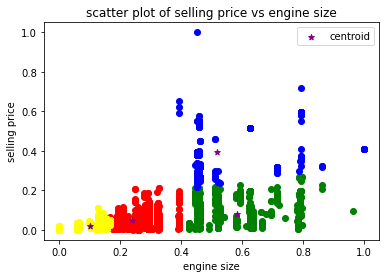

In [115]:
df_k['cluster']=y_predicted
df1=df_k[df_k.cluster==0]
df2=df_k[df_k.cluster==1]
df3=df_k[df_k.cluster==2]
df4=df_k[df_k.cluster==3]
plt.scatter(df1['engine'],df1['selling_price'],color='green')
plt.scatter(df2['engine'],df2['selling_price'],color='red')
plt.scatter(df3['engine'],df3['selling_price'],color='yellow')
plt.scatter(df4['engine'],df4['selling_price'],color='blue')
plt.xlabel('engine size')
plt.ylabel('selling price')
plt.title('scatter plot of selling price vs engine size')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
silhouette_score(df_k,km.labels_)

0.9246538814143607

## Supervised Learning (Linear regression)

In [178]:
x,y = car_data[['max_power']], car_data[['selling_price']]
reg = linear_model.LinearRegression()

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
minmax = MinMaxScaler()

In [183]:
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.fit_transform(X_test)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

In [184]:
reg.coef_, reg.intercept_

(array([[4158322.53421872]]), array([-338246.15602272]))

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3354908742280982

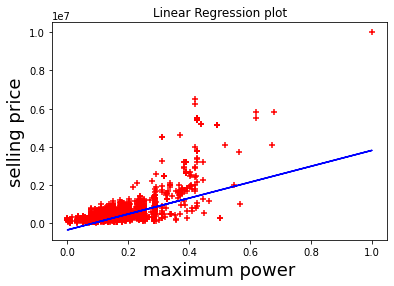

In [186]:
plt.xlabel('maximum power', fontsize=18)
plt.ylabel('selling price', fontsize=18)
plt.title('Linear Regression plot')
plt.scatter(X_test_scaled,y_test,color='red',marker='+')
plt.plot(X_test_scaled,y_pred,color='blue')